<a href="https://colab.research.google.com/github/vamshi-gugulothu/MakeoverMonday-Projects/blob/main/fake_profile_detection_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import sys
import csv
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

import gender_guesser.detector as gender

from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier  # Import XGBoostClassifier
from sklearn.tree import DecisionTreeClassifier  # Import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  # Import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  # Import GradientBoosting
from sklearn.linear_model import LogisticRegression  # Import LogisticRegression
from sklearn.ensemble import StackingClassifier  # Import StackingClassifier

In [2]:
pip install gender_guesser

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.3/379.3 kB 5.0 MB/s eta 0:00:00


# New Section

In [4]:
real_users = pd.read_csv('users.csv')
fake_users = pd.read_csv('fusers.csv')

In [5]:
real_users.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
0,3610511,Davide Dellacasa,braddd,20370,5470,2385,145,52,Fri Apr 06 10:58:22 +0000 2007,http://braddd.tumblr.com,...,FFF7CC,http://a0.twimg.com/profile_background_images/...,BADFCD,FF0000,3600.0,NaN,NaN,Founder of http://www.screenweek.it & http://w...,2015-02-14 10:54:49,E13
1,5656162,Simone Economo,eKoeS,3131,506,381,9,40,Mon Apr 30 15:08:42 +0000 2007,http://www.lineheight.net/,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,3600.0,NaN,NaN,BSc degree (cum laude) in Computer Engineering...,2015-02-14 10:54:49,E13
2,5682702,tacone,tacone_,4024,264,87,323,16,Tue May 01 11:53:40 +0000 2007,http://t.co/LKrl1dZE,...,000000,http://a0.twimg.com/profile_background_images/...,1A1B1F,2FC2EF,3600.0,NaN,NaN,Cogito ergo bestemmio.,2015-02-14 10:54:49,E13
3,6067292,alesaura,alesstar,40586,640,622,1118,32,Tue May 15 16:55:16 +0000 2007,http://alesstar.wordpress.com/,...,95E8EC,http://a0.twimg.com/images/themes/theme4/bg.gif,0099B9,0099B9,3600.0,NaN,NaN,"Se la vita ti dà sarde, scapocciale!",2015-02-14 10:54:49,E13
4,6015122,Angelo,PerDiletto,2016,62,64,13,0,Sun May 13 19:52:00 +0000 2007,http://www.flickr.com/per_diletto,...,F6F6F6,http://a0.twimg.com/images/themes/theme18/bg.gif,ACDED6,038543,3600.0,NaN,NaN,Je me souviens,2015-02-14 10:54:49,E13


In [6]:
fake_users.head()

,id,name,screen_name,statuses_count,followers_count,friends_count,favourites_count,listed_count,created_at,url,...,profile_sidebar_fill_color,profile_background_image_url,profile_background_color,profile_link_color,utc_offset,protected,verified,description,updated,dataset
0,370098498,pirfectmoses,pirfectmoses,24,4,588,16,0,Thu Sep 08 13:20:35 +0000 2011,NaN,...,DDEEF6,http://a0.twimg.com/profile_background_images/...,C6E2EE,1F98C7,NaN,NaN,NaN,NaN,2015-02-14 10:40:01,INT
1,37384589,SAK Nair,bsknair1967,656,57,693,597,0,Sun May 03 07:35:13 +0000 2009,NaN,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,NaN,NaN,NaN,in Kuwait with my buetiful family.,2015-02-14 10:40:01,INT
2,72110028,Deepak,dedjven,1234,15,104,1150,0,Sun Sep 06 19:50:08 +0000 2009,NaN,...,EFEFEF,http://a0.twimg.com/images/themes/theme14/bg.gif,131516,009999,-39600.0,NaN,NaN,NaN,2015-02-14 10:40:01,INT
3,82885728,Marcos Vinicius,BrowAlves,573,14,227,530,0,Fri Oct 16 14:02:48 +0000 2009,NaN,...,DDEEF6,http://a0.twimg.com/profile_background_images/...,C0DEED,0084B4,NaN,NaN,NaN,NaN,2015-02-14 10:40:01,INT
4,110120789,Shri Kant Kanaujia,kanaujiask,675,18,519,653,0,Sun Jan 31 12:08:41 +0000 2010,NaN,...,DDEEF6,http://a0.twimg.com/images/themes/theme1/bg.png,C0DEED,0084B4,19800.0,NaN,NaN,NaN,2015-02-14 10:40:01,INT


In [7]:
len(real_users),len(fake_users)

(1481, 1337)

In [8]:
real_users.describe()

,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,default_profile,default_profile_image,geo_enabled,profile_use_background_image,profile_background_tile,utc_offset,protected,verified
count,1.481000e+03,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,397.0,4.0,719.0,1423.0,486.0,1063.000000,0.0,0.0
mean,4.000432e+08,3140.782579,690.922350,403.128292,439.611749,5.360567,1.0,1.0,1.0,1.0,1.0,1535.841957,NaN,NaN
std,2.961304e+08,6391.957957,11058.508986,610.572368,1970.556008,32.183232,0.0,0.0,0.0,0.0,0.0,7805.690161,NaN,NaN
min,3.610511e+06,3.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,1.0,1.0,1.0,-39600.000000,NaN,NaN
25%,1.572905e+08,315.000000,45.000000,115.000000,4.000000,0.000000,1.0,1.0,1.0,1.0,1.0,3600.000000,NaN,NaN
50%,3.822478e+08,992.000000,102.000000,226.000000,29.000000,1.000000,1.0,1.0,1.0,1.0,1.0,3600.000000,NaN,NaN
75%,5.229255e+08,3029.000000,259.000000,437.000000,176.000000,2.000000,1.0,1.0,1.0,1.0,1.0,3600.000000,NaN,NaN
max,1.219743e+09,79876.000000,408372.000000,12773.000000,44349.000000,744.000000,1.0,1.0,1.0,1.0,1.0,36000.000000,NaN,NaN


In [9]:
fake_users.describe()

,id,statuses_count,followers_count,friends_count,favourites_count,listed_count,url,default_profile,default_profile_image,geo_enabled,profile_use_background_image,profile_background_tile,utc_offset,protected,verified
count,1.337000e+03,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,0.0,1331.0,4.0,2.0,1337.0,3.0,6.000000,0.0,0.0
mean,6.897381e+08,45.442034,16.842184,386.761406,7.383695,0.002992,NaN,1.0,1.0,1.0,1.0,1.0,-8700.000000,NaN,NaN
std,2.135086e+08,97.765536,8.011299,210.139672,89.155940,0.054636,NaN,0.0,0.0,0.0,0.0,0.0,31247.847926,NaN,NaN
min,3.738459e+07,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.0,1.0,1.0,1.0,1.0,-39600.000000,NaN,NaN
25%,6.163001e+08,26.000000,13.000000,278.000000,0.000000,0.000000,NaN,1.0,1.0,1.0,1.0,1.0,-36000.000000,NaN,NaN
50%,6.170879e+08,36.000000,18.000000,344.000000,0.000000,0.000000,NaN,1.0,1.0,1.0,1.0,1.0,-8100.000000,NaN,NaN
75%,6.192317e+08,53.000000,22.000000,538.000000,0.000000,0.000000,NaN,1.0,1.0,1.0,1.0,1.0,19800.000000,NaN,NaN
max,1.391998e+09,1576.000000,73.000000,1998.000000,1402.000000,1.000000,NaN,1.0,1.0,1.0,1.0,1.0,19800.000000,NaN,NaN


In [10]:
def read_datasets():
    """Reads users profile from csv files and performs preprocessing."""

    real_users = pd.read_csv("users.csv")
    fake_users = pd.read_csv("fusers.csv")

    # Handle missing values
    real_users.fillna(-1, inplace=True)
    fake_users.fillna(-1, inplace=True)

    # Concatenate data
    x = pd.concat([real_users, fake_users])

    # Create target variable
    y = len(fake_users) * [0] + len(real_users) * [1]

    # Feature engineering (example: create interaction term)
    x['followers_per_friend'] = x['followers_count'] / (x['friends_count'] + 1)


    return x, y

In [11]:
def predict_sex(name):
    d = gender.Detector(case_sensitive=False)
    first_name= str(name).split(' ')[0]
    sex = d.get_gender(u"{}".format(first_name))

    sex_code_dict = {'female': -2, 'mostly_female': -1,'unknown':0, 'andy': 0, 'mostly_male':1, 'male': 2}
    code = sex_code_dict[sex]

    return code

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

def extract_features(x):
  """
  Extracts and engineers features from a DataFrame for XGBoost classification.
0
  Args:
      x: Pandas DataFrame containing user data.

  Returns:
      Pandas DataFrame containing extracted and engineered features.
  """

  # Feature Engineering
  # - Interaction terms
  x['statuses_per_friend'] = x['statuses_count'] / (x['friends_count'] + 1)  # Avoid division by zero
  x['created_at'] = pd.to_datetime(x['created_at'],errors='coerce', utc=True).dt.tz_localize(None)
  now = pd.to_datetime('now').tz_localize(None)
  # x['created_at'] = pd.to_datetime(x['created_at'], errors='coerce', utc=True)
  # now = pd.Timestamp.now(tz=None)
  # - Time-based features (assuming 'created_at' is a datetime object)
  x['account_age_days'] = (now - x['created_at']).dt.days
  x['tweets_per_day'] = x['statuses_count'] / x['account_age_days']
  x['recent_activity_rate'] = x['statuses_count'] / (now - x['created_at']).dt.days  # Recent activity rate


  # Data Preprocessing
  # - Handle missing values
  # Impute missing values with mean for numeric columns only
  numeric_cols = x.select_dtypes(include=np.number).columns
  x[numeric_cols] = x[numeric_cols].fillna(x[numeric_cols].mean())

  # Impute missing values in non-numeric columns with mode or other strategy.
  non_numeric_cols = x.select_dtypes(exclude=np.number).columns
  for col in non_numeric_cols:
      x[col] = x[col].fillna(x[col].mode()[0])  # Using mode for categorical columns

  # - Encode categorical features
  categorical_cols = ['lang', 'location']
  le = LabelEncoder()
  for col in categorical_cols:
      if col in x.columns:
          x[col] = le.fit_transform(x[col].astype(str))
  # - Feature Scaling
  numerical_cols = ['statuses_count', 'followers_count', 'friends_count',
                      'favourites_count', 'listed_count', 'statuses_per_friend',
                      'tweets_per_day', 'account_age_days', 'recent_activity_rate']
  scaler = StandardScaler()
  x[numerical_cols] = scaler.fit_transform(x[numerical_cols])

  # Feature Selection (performed separately during model training)

  # Return selected features
  return x[['statuses_count', 'followers_count', 'friends_count',
              'favourites_count', 'listed_count', 'statuses_per_friend',
              'tweets_per_day', 'account_age_days', 'recent_activity_rate',
              'lang', 'location']]

In [13]:

import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plots the learning curve for a machine learning model.

    Args:
        estimator: The machine learning model.
        title: The title of the plot.
        X: The feature matrix.
        y: The target variable.
        ylim: Optional tuple specifying the y-axis limits.
        cv: Cross-validation strategy.
        n_jobs: Number of jobs to run in parallel.
        train_sizes: Array specifying the proportion of training data to use for each iteration.

    Returns:
        The created plot object.
    """

    plt.figure(figsize=(10, 6))  # Adjust figure size
    plt.title(title, fontsize=14)  # Increase font size
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples", fontsize=12)
    plt.ylabel("Score", fontsize=12)
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid(True, linestyle='--')  # Add gridlines

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="r", label="Training score")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, color="g",
                     label="Cross-validation score")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score", markersize=8)
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score", markersize=8)

    plt.legend(loc="best", fontsize=12)
    plt.tight_layout()  # Adjust spacing for better readability

    return plt

In [14]:
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    """
    Plots a confusion matrix with normalized values and additional annotations.

    Args:
        cm (np.ndarray): Confusion matrix (2D array).
        classes (list): List of class labels.
        title (str, optional): Title for the plot. Defaults to 'Confusion Matrix'.
        cmap (matplotlib.colors.Colormap, optional): Colormap for the heatmap. Defaults to plt.cm.Blues.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize for percentages
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    # Annotate with counts and percentages
    for i in range(len(classes)):
        for j in range(len(classes)):
            text = f"{cm[i, j]:.2f}"  # Format to 2 decimal places
            plt.text(j, i, text, ha="center", va="center", fontsize=8, bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.grid(False)  # Remove gridlines for better readability

plt.show()

In [25]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from collections import Counter

def is_imbalanced(y):
    """Checks if the target variable is imbalanced.

    Args:
        y: The target variable (1D array-like).

    Returns:
        True if the target variable is imbalanced, False otherwise.
    """
    counts = Counter(y)
    most_common_count = counts.most_common(1)[0][1]
    least_common_count = counts.most_common()[-1][1]

    # Define imbalance threshold (e.g., 20% difference)
    threshold = 0.2

    return (most_common_count - least_common_count) / most_common_count > threshold



def train_with_xgboost(X_train, y_train , X_test, cv=5, scoring='f1_macro'):
    """
    Trains and predicts on a dataset with an XGBoost classifier, performing feature scaling,
    hyperparameter tuning, and evaluation.

    Args:
        X_train: Training data features (2D array).
        y_train: Training data labels (1D array).
        X_test: Testing data features (2D array).
        cv: Number of folds for cross-validation (defaults to 5).
        scoring: Metric to use for evaluation during hyperparameter tuning (defaults to 'f1_macro').

    Returns:
        y_pred: Predicted class labels for the test data (1D array).
    """

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Handle imbalanced classes (if necessary)
    if is_imbalanced(y_train):  # Check for imbalance
        smote = SMOTE()
        X_train_scaled, y_train_scaled = smote.fit_resample(X_train_scaled, y_train)
    else:
        # If not imbalanced, use the original y_train
        y_train_scaled = y_train

    # Hyperparameter tuning
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.2, 0.3],
        'max_depth': [3, 5, 7]
    }
    model = XGBClassifier()
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring, error_score='raise')
    grid_search.fit(X_train_scaled, y_train_scaled)
    best_model = grid_search.best_estimator_

    # Evaluate the best model
    y_pred_train = best_model.predict(X_train_scaled)
    print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
    print(f"Training F1-score (macro): {f1_score(y_train, y_pred_train, average='macro'):.4f}")
    print(f"Training Precision: {precision_score(y_train, y_pred_train):.4f}")
    print(f"Training Recall: {recall_score(y_train, y_pred_train):.4f}")


     # Estimate score
    scores = cross_val_score(best_model, X_train, y_train)

    print('Estimated score: %0.5f (+/- %0.5f)' % (scores.mean(), scores.std() / 2))

    title = 'Learning Curves (XGBoost)'

    plot_learning_curve(best_model, title, X_train_scaled, y_train_scaled, cv=cv)
    plt.show()

    # Make predictions on test data
    y_pred = best_model.predict(X_test_scaled)

    return y_pred

In [19]:
x, y = read_datasets()
print("dataset read complete")

dataset read complete


In [20]:

x = extract_features(x)
print(x.columns)

<ipython-input-12-2ff6c4e48ed6>:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  x['created_at'] = pd.to_datetime(x['created_at'],errors='coerce', utc=True).dt.tz_localize(None)


Index(['statuses_count', 'followers_count', 'friends_count',
       'favourites_count', 'listed_count', 'statuses_per_friend',
       'tweets_per_day', 'account_age_days', 'recent_activity_rate', 'lang',
       'location'],
      dtype='object')


In [21]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Training Accuracy: 0.9854
Training F1-score (macro): 0.9853
Training Precision: 1.0000
Training Recall: 0.9722
Estimated score: 0.96229 (+/- 0.00543)


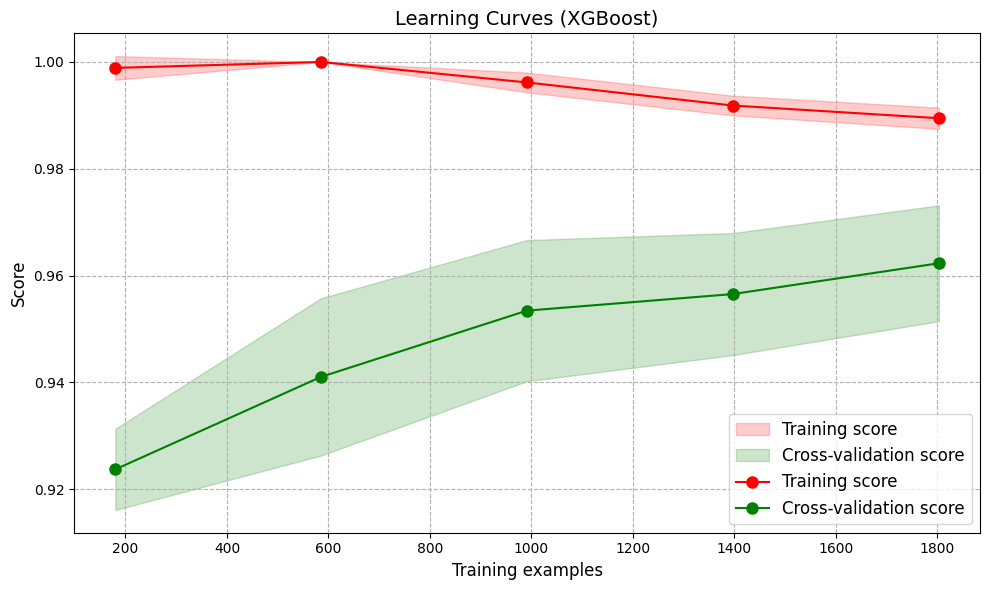

In [37]:
y_pred_xgboost = train_with_xgboost(X_train, y_train, X_test)

Confusion matrix for XGBoost, without normalization
[[268   2]
 [ 28 266]]


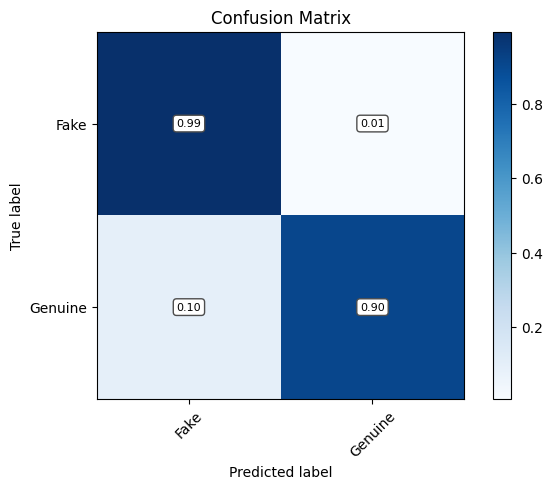

In [38]:
confusionMatrixXGBoost = confusion_matrix(y_test, y_pred_xgboost)
print('Confusion matrix for XGBoost, without normalization')
print(confusionMatrixXGBoost)

# Assuming you have the 'classes' variable defined (e.g., ['Fake', 'Genuine'])
plot_confusion_matrix(confusionMatrixXGBoost, classes=['Fake', 'Genuine'])

In [39]:
print(classification_report(y_test, y_pred_xgboost, target_names=['Fake', 'Genuine']))

              precision    recall  f1-score   support

        Fake       0.91      0.99      0.95       270
     Genuine       0.99      0.90      0.95       294

    accuracy                           0.95       564
   macro avg       0.95      0.95      0.95       564
weighted avg       0.95      0.95      0.95       564



In [40]:
print('Classification Accuracy on Test dataset (XGBoost):', accuracy_score(y_test, y_pred_xgboost))

Classification Accuracy on Test dataset (XGBoost): 0.9468085106382979


For Decision tree



In [41]:
def train_with_decision_tree(X_train, y_train, X_test, cv=5, scoring='f1_macro'):
    """
    Trains and predicts on a dataset with an DecisionTree classifier, performing feature scaling,
    hyperparameter tuning, and evaluation.

    Args:
        X_train: Training data features (2D array).
        y_train: Training data labels (1D array).
        X_test: Testing data features (2D array).
        cv: Number of folds for cross-validation (defaults to 5).
        scoring: Metric to use for evaluation during hyperparameter tuning (defaults to 'f1_macro').

    Returns:
        y_pred: Predicted class labels for the test data (1D array).
    """

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Hyperparameter tuning
    param_grid = {
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    model = DecisionTreeClassifier()
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring)
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_

    # Evaluate the best model
    y_pred_train = best_model.predict(X_train_scaled)
    print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
    print(f"Training F1-score (macro): {f1_score(y_train, y_pred_train, average='macro'):.4f}")
    print(f"Training Precision: {precision_score(y_train, y_pred_train):.4f}")
    print(f"Training Recall: {recall_score(y_train, y_pred_train):.4f}")

     # Estimate score
    scores = grid_search.cv_results_['mean_test_score']
    print('Estimated score (GridSearchCV): %0.5f (+/- %0.5f)' % (scores.mean(), scores.std() / 2))

    title = 'Learning Curves (Decision Tree)'
    plot_learning_curve(best_model, title, X_train, y_train, cv=5)
    plt.show()

    # Make predictions on test data
    y_pred = best_model.predict(X_test_scaled)

    return y_pred

Training Accuracy: 0.9667
Training F1-score (macro): 0.9667
Training Precision: 1.0000
Training Recall: 0.9368
Estimated score (GridSearchCV): 0.95377 (+/- 0.00118)


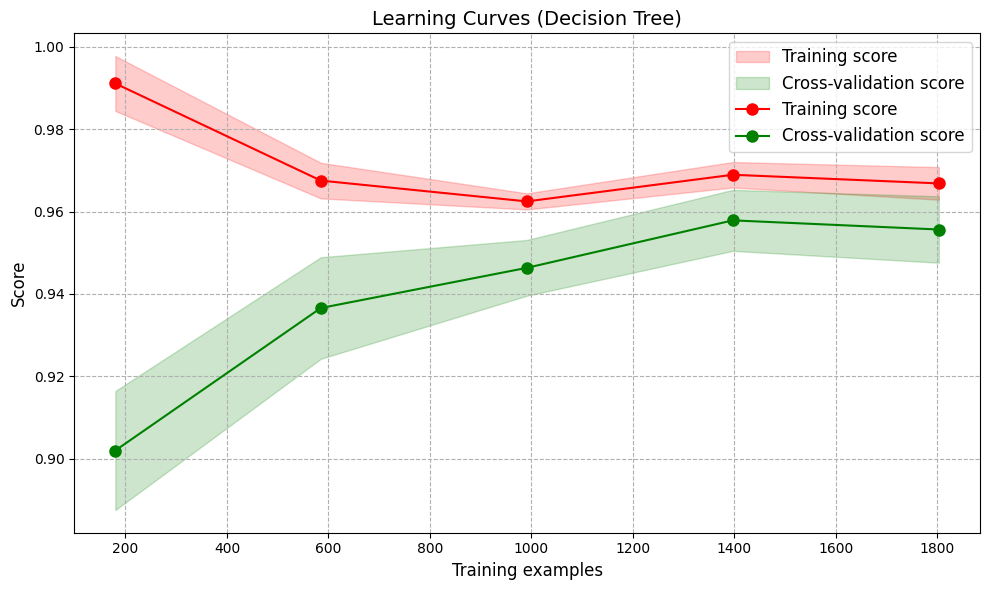

In [42]:
y_pred_decision_tree = train_with_decision_tree(X_train, y_train, X_test)

Confusion matrix for Decision Tree, without normalization
[[269   1]
 [ 29 265]]


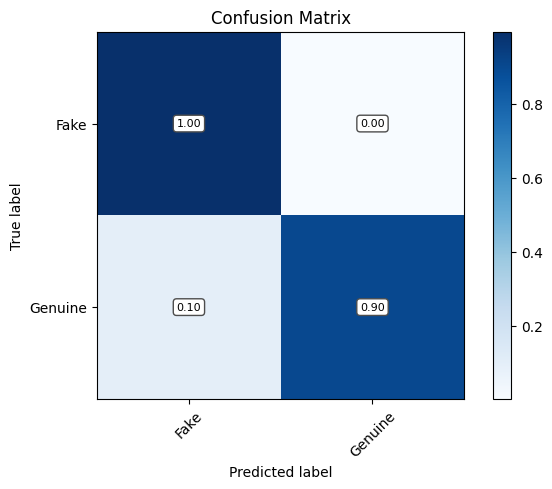

In [43]:
confusionMatrixDecisionTree = confusion_matrix(y_test, y_pred_decision_tree)
print('Confusion matrix for Decision Tree, without normalization')
print(confusionMatrixDecisionTree)
plot_confusion_matrix(confusionMatrixDecisionTree,classes=['Fake', 'Genuine'])

In [44]:
print(classification_report(y_test, y_pred_decision_tree, target_names=['Fake', 'Genuine']))

              precision    recall  f1-score   support

        Fake       0.90      1.00      0.95       270
     Genuine       1.00      0.90      0.95       294

    accuracy                           0.95       564
   macro avg       0.95      0.95      0.95       564
weighted avg       0.95      0.95      0.95       564



In [45]:
print('Classification Accuracy on Test dataset (Decision Tree):', accuracy_score(y_test, y_pred_decision_tree))

Classification Accuracy on Test dataset (Decision Tree): 0.9468085106382979


For RandomForestClassification



In [46]:
def train_random_forest(X_train, y_train, X_test, cv=5, scoring='f1_macro'):
    """
    Trains and predicts on a dataset with an RandomForest classifier, performing feature scaling,
    hyperparameter tuning, and evaluation.

    Args:
        X_train: Training data features (2D array).
        y_train: Training data labels (1D array).
        X_test: Testing data features (2D array).
        cv: Number of folds for cross-validation (defaults to 5).
        scoring: Metric to use for evaluation during hyperparameter tuning (defaults to 'f1_macro').

    Returns:
        y_pred: Predicted class labels for the test data (1D array).
    """

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Hyperparameter tuning
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'max_features': ['sqrt', 'log2']
    }
    model = RandomForestClassifier()
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring=scoring)
    grid_search.fit(X_train_scaled, y_train)
    best_model = grid_search.best_estimator_

    # Evaluate the best model
    y_pred_train = best_model.predict(X_train_scaled)
    print(f"Training Accuracy: {accuracy_score(y_train, y_pred_train):.4f}")
    print(f"Training F1-score (macro): {f1_score(y_train, y_pred_train, average='macro'):.4f}")
    print(f"Training Precision: {precision_score(y_train, y_pred_train):.4f}")
    print(f"Training Recall: {recall_score(y_train, y_pred_train):.4f}")

     # Estimate score
    scores = grid_search.cv_results_['mean_test_score']
    print('Estimated score (GridSearchCV): %0.5f (+/- %0.5f)' % (scores.mean(), scores.std() / 2))

    title = 'Learning Curves (Decision Tree)'
    plot_learning_curve(best_model, title, X_train, y_train, cv=5)
    plt.show()

    # Make predictions on test data
    y_pred = best_model.predict(X_test_scaled)

    return y_pred

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Training Accuracy: 1.0000
Training F1-score (macro): 1.0000
Training Precision: 1.0000
Training Recall: 1.0000
Estimated score (GridSearchCV): 0.95355 (+/- 0.00086)


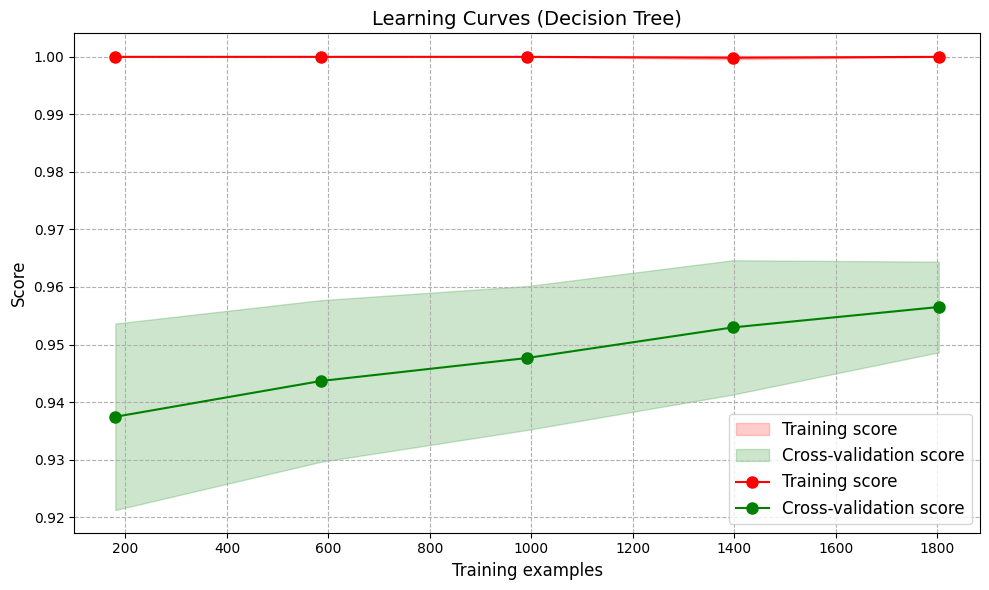

In [47]:
y_pred = train_random_forest(X_train, y_train, X_test)

Confusion matrix, without normalization
[[269   1]
 [ 34 260]]


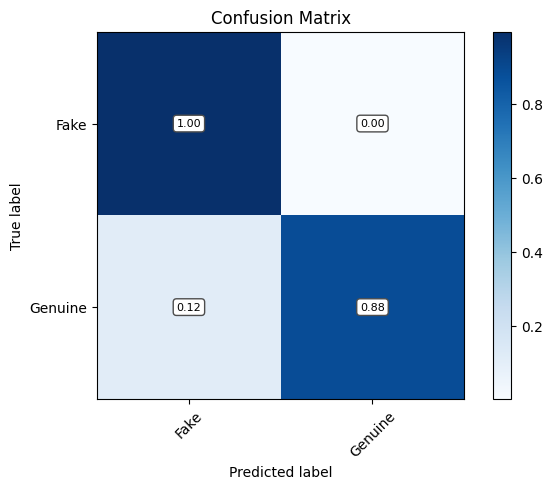

In [48]:
confusionMatrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix, without normalization')
print(confusionMatrix)
plot_confusion_matrix(confusionMatrix,classes=['Fake', 'Genuine'])

In [49]:
print(classification_report(y_test, y_pred, target_names=['Fake','Genuine']))

              precision    recall  f1-score   support

        Fake       0.89      1.00      0.94       270
     Genuine       1.00      0.88      0.94       294

    accuracy                           0.94       564
   macro avg       0.94      0.94      0.94       564
weighted avg       0.94      0.94      0.94       564



In [50]:
print('Classification Accuracy on Test dataset: ' ,accuracy_score(y_test, y_pred))

Classification Accuracy on Test dataset:  0.9379432624113475


For Hybrid Model

In [ ]:

def train_hybrid_model(X_train, y_train, X_test):
    """
    Trains a hybrid model using stacking with Random Forest, Gradient Boosting, and Logistic Regression.

    Args:
        X_train: Training data features (2D array).
        y_train: Training data labels (1D array).
        X_test: Testing data features (2D array).

    Returns:
        y_pred: Predicted class labels for the test data (1D array).
    """

    # Feature scaling
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    # Define hyperparameter grids for each model
    rf_params = {  # Added: Define rf_params
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    gbm_params = {  # Added: Define gbm_params
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
    meta_params = {  # Added: Define meta_params
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2']
    }
    cv = 5  # Added: Define cv
    scoring = 'accuracy'  # Added: Define scoring
    # Create base models
    rf_model = RandomForestClassifier(random_state=42)
    gbm_model = GradientBoostingClassifier(random_state=42)

    # Create meta-model
    meta_model = LogisticRegression()
    # Train base models with hyperparameter tuning
    rf_grid_search = GridSearchCV(rf_model, rf_params, cv=cv, scoring=scoring)
    rf_grid_search.fit(X_train_scaled, y_train)
    best_rf_model = rf_grid_search.best_estimator_

    gbm_grid_search = GridSearchCV(gbm_model, gbm_params, cv=cv, scoring=scoring)
    gbm_grid_search.fit(X_train_scaled, y_train)
    best_gbm_model = gbm_grid_search.best_estimator_

    meta_grid_search = GridSearchCV(meta_model, meta_params, cv=cv, scoring=scoring)
    meta_grid_search.fit(X_train_scaled, y_train)
    best_meta_model = meta_grid_search.best_estimator_
    # Train base models
    #rf_model.fit(X_train_scaled, y_train)
    #gbm_model.fit(X_train_scaled, y_train)

    # Create stacking classifier
    stacking_clf = StackingClassifier(estimators=[('rf', rf_model), ('gbm', gbm_model)], final_estimator=meta_model)

    # Train the stacking classifier
    stacking_clf.fit(X_train_scaled, y_train)

    plot_learning_curve(stacking_clf, "Learning Curve (Hybrid Model)", X_train, y_train, cv=5)
    plt.show()

    # Make predictions
    y_pred = stacking_clf.predict(X_test_scaled)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("AUC:", auc)

    return y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

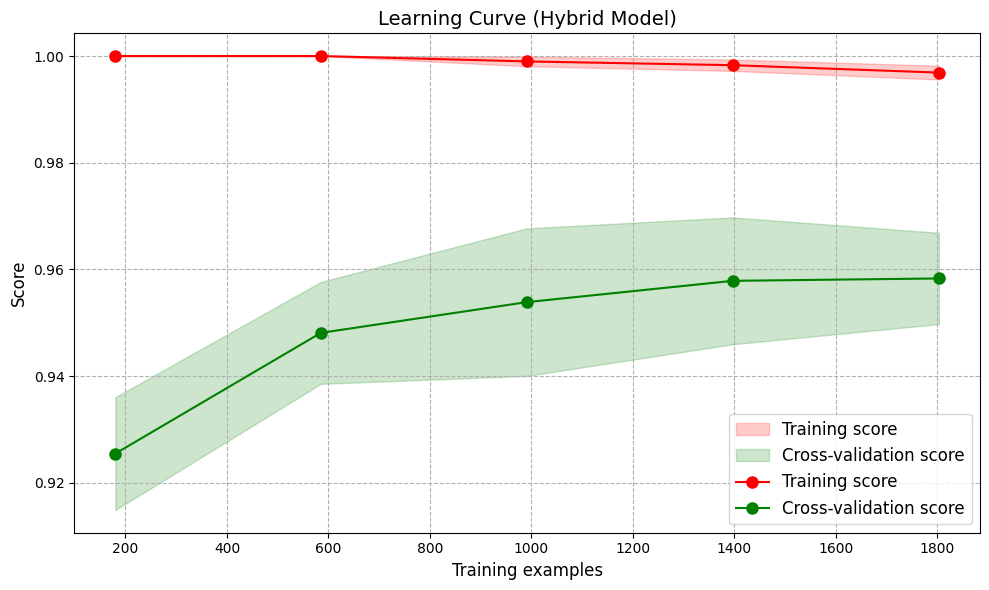

Accuracy: 0.9397163120567376
Precision: 0.9779411764705882
Recall: 0.9047619047619048
F1-score: 0.9399293286219081
AUC: 0.9412698412698413


In [ ]:
y_pred = train_hybrid_model(X_train, y_train, X_test)

Confusion matrix, without normalization
[[264   6]
 [ 28 266]]


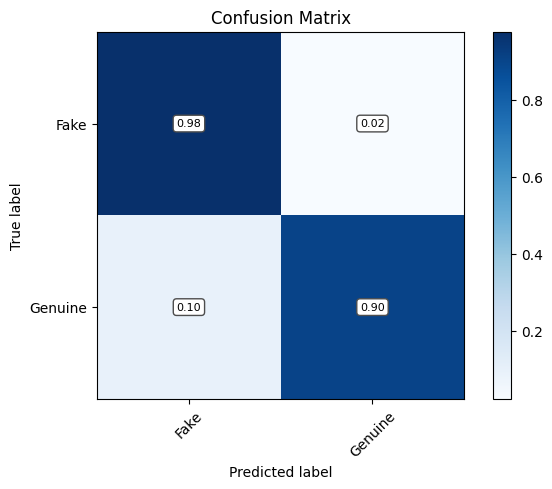

In [ ]:
confusionMatrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix, without normalization')
print(confusionMatrix)
plot_confusion_matrix(confusionMatrix,classes=['Fake', 'Genuine'])

In [ ]:
print(classification_report(y_test, y_pred, target_names=['Fake','Genuine']))

              precision    recall  f1-score   support

        Fake       0.90      0.98      0.94       270
     Genuine       0.98      0.90      0.94       294

    accuracy                           0.94       564
   macro avg       0.94      0.94      0.94       564
weighted avg       0.94      0.94      0.94       564



In [ ]:
print('Classification Accuracy on Test dataset: ' ,accuracy_score(y_test, y_pred))

Classification Accuracy on Test dataset:  0.9397163120567376


In [ ]:
For hybrid model xgboost and decison tree

In [59]:
def train_hybrid_model_xg(X_train, y_train, X_test, cv=5, scoring='f1_macro'):
  """
  Trains and predicts on a dataset with a hybrid model using stacking with XGBoost and Decision Tree classifiers, performing feature scaling, hyperparameter tuning, and evaluation.

  Args:
      X_train: Training data features (2D array).
      y_train: Training data labels (1D array).
      X_test: Testing data features (2D array).
      cv: Number of folds for cross-validation (defaults to 5).
      scoring: Metric to use for evaluation during hyperparameter tuning (defaults to 'f1_macro').

  Returns:
      y_pred: Predicted class labels for the test data (1D array).
  """

  # Feature scaling
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)


  # Define base models and hyperparameter grids
  xgb_model = XGBClassifier()
  xgb_params = {
      'n_estimators': [100, 200, 300],
      'learning_rate': [0.05, 0.1, 0.2],
      'max_depth': [4, 6, 8],
      'subsample': [0.7, 0.8, 0.9],
      'colsample_bytree': [0.7, 0.8, 0.9],
  }

  dt_model = DecisionTreeClassifier()
  dt_params ={
      'max_depth': [3, 5, 7],
      'min_samples_split': [5, 10, 15],
      'min_samples_leaf': [1, 2, 4],
  }

  # Create meta-model
  meta_model = LogisticRegression()

  # # Early stopping for GridSearchCV
  # early_stopping = EarlyStopping(monitor='val_loss', patience=3)

  # Stratified K-Fold cross-validation
  skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

  # Perform hyperparameter tuning for base models
  xgb_grid_search = GridSearchCV(xgb_model, xgb_params, cv=cv, scoring=scoring)
  xgb_grid_search.fit(X_train_scaled, y_train)
  best_xgb_model = xgb_grid_search.best_estimator_

  dt_grid_search = GridSearchCV(dt_model, dt_params, cv=cv, scoring=scoring)
  dt_grid_search.fit(X_train_scaled, y_train)
  best_dt_model = dt_grid_search.best_estimator_

  # Create stacking classifier
  stacking_clf = StackingClassifier(
    estimators=[('xgb', best_xgb_model), ('dt', best_dt_model)], final_estimator=meta_model)

  # Train the stacking classifier
  stacking_clf.fit(X_train_scaled, y_train)

  # Make predictions
  y_pred = stacking_clf.predict(X_test_scaled)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test,y_pred)
  f1 = f1_score(y_test, y_pred)

  auc = roc_auc_score(y_test, y_pred)

  print("Evaluation Metrics:")
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1-score:", f1)
  print("AUC:", auc)

  return y_pred

In [58]:
y_pred = train_hybrid_model_xg(X_train, y_train, X_test)

Evaluation Metrics:
Accuracy: 0.9485815602836879
Precision: 0.9925650557620818
Recall: 0.9081632653061225
F1-score: 0.9484902309058615
AUC: 0.9503779289493575


Confusion matrix, without normalization
[[268   2]
 [ 27 267]]


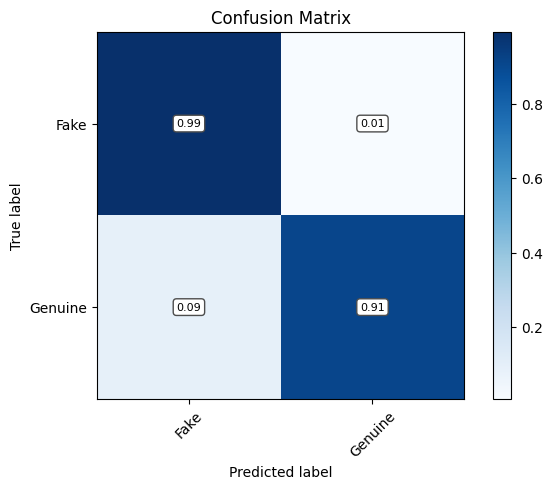

In [60]:
confusionMatrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix, without normalization')
print(confusionMatrix)
plot_confusion_matrix(confusionMatrix,classes=['Fake', 'Genuine'])

In [61]:
print(classification_report(y_test, y_pred, target_names=['Fake','Genuine']))

              precision    recall  f1-score   support

        Fake       0.91      0.99      0.95       270
     Genuine       0.99      0.91      0.95       294

    accuracy                           0.95       564
   macro avg       0.95      0.95      0.95       564
weighted avg       0.95      0.95      0.95       564



In [62]:
print('Classification Accuracy on Test dataset: ' ,accuracy_score(y_test, y_pred))

Classification Accuracy on Test dataset:  0.9485815602836879


In [16]:
def train_hybrid_model_xg2(X_train, y_train, X_test, cv=5, scoring='f1_macro'):
  """
  Trains and predicts on a dataset with a hybrid model using stacking with XGBoost and Decision Tree classifiers, performing feature scaling, hyperparameter tuning, and evaluation.

  Args:
      X_train: Training data features (2D array).
      y_train: Training data labels (1D array).
      X_test: Testing data features (2D array).
      cv: Number of folds for cross-validation (defaults to 5).
      scoring: Metric to use for evaluation during hyperparameter tuning (defaults to 'f1_macro').

  Returns:
      y_pred: Predicted class labels for the test data (1D array).
  """

  # Feature scaling
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)
  X_test_scaled = scaler.transform(X_test)


  # Define base models and hyperparameter grids
  xgb_model = XGBClassifier()
  xgb_params = {
      'n_estimators': [100, 200, 300],
      'learning_rate': [0.05, 0.1, 0.2],
      'max_depth': [4, 6, 8],
      'subsample': [0.7, 0.8, 0.9],
      'colsample_bytree': [0.7, 0.8, 0.9],
  }

  dt_model = DecisionTreeClassifier()
  dt_params ={
      'max_depth': [3, 5, 7],
      'min_samples_split': [5, 10, 15],
      'min_samples_leaf': [1, 2, 4],
  }

  # Create meta-model
  meta_model = LogisticRegression()

  # # Early stopping for GridSearchCV
  # early_stopping = EarlyStopping(monitor='val_loss', patience=3)

  # Stratified K-Fold cross-validation
  skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)

  # Perform hyperparameter tuning for base models
  xgb_grid_search = GridSearchCV(xgb_model, xgb_params, cv=cv, scoring=scoring)
  xgb_grid_search.fit(X_train_scaled, y_train)
  best_xgb_model = xgb_grid_search.best_estimator_

  dt_grid_search = GridSearchCV(dt_model, dt_params, cv=cv, scoring=scoring)
  dt_grid_search.fit(X_train_scaled, y_train)
  best_dt_model = dt_grid_search.best_estimator_

  # Create stacking classifier
  stacking_clf = StackingClassifier(
    estimators=[('xgb', best_xgb_model), ('dt', best_dt_model)], final_estimator=meta_model)

  # Train the stacking classifier
  stacking_clf.fit(X_train_scaled, y_train)

  plot_learning_curve(stacking_clf, "Learning Curve (Hybrid Model)", X_train, y_train, cv=5)
  plt.show()

  # Make predictions
  y_pred = stacking_clf.predict(X_test_scaled)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test,y_pred)
  f1 = f1_score(y_test, y_pred)

  auc = roc_auc_score(y_test, y_pred)

  print("Evaluation Metrics:")
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1-score:", f1)
  print("AUC:", auc)

  return y_pred